In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

In [30]:
from warnings import filterwarnings
filterwarnings('ignore')

In [31]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [32]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

## model ve tahmin

In [33]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

Text(0, 0.5, 'Salary')

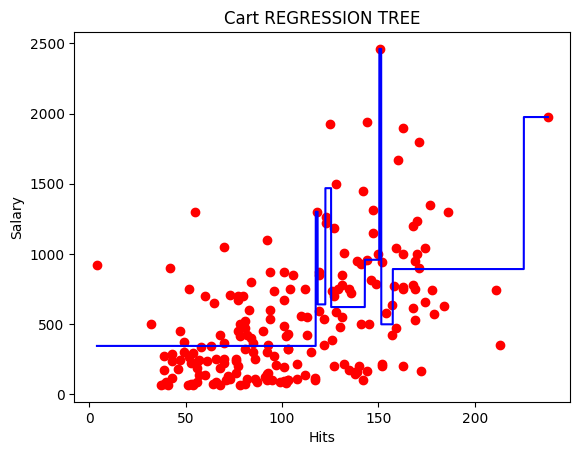

In [34]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(X_train,y_train,color="red")
plt.plot(X_grid,cart_model.predict(X_grid),color="blue")

plt.title("Cart REGRESSION TREE")
plt.xlabel("Hits")
plt.ylabel("Salary")

In [35]:
# tahmin

In [36]:
pred_y = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred_y))

486.34593105235456

# tüm verilerle modeli yeniden kurarsak

In [74]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [83]:
cart_model = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)

In [84]:
pred_y = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred_y))

435.5862735193396

# model tuning

In [91]:
cart_params = {"max_depth":[2,3,4,5,10,20],
              "min_samples_split":[2,10,5,30,50,100]}

In [92]:
cart_model = DecisionTreeRegressor()

In [93]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

In [94]:
cart_cv_model.best_params_

{'max_depth': 10, 'min_samples_split': 50}

In [95]:
cart_model = DecisionTreeRegressor(max_depth=10,min_samples_split=50).fit(X_train,y_train)

In [96]:
pred_y = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred_y))

361.0876906511434